<a href="https://colab.research.google.com/github/dmp40/DataAnalitikCurse-23/blob/storks/%D0%9F%D0%BE%D0%BA%D1%80%D0%B5%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%94_%D0%A1_%22movies_eda_2_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Разведочный анализ по датасету IMDb Movies: 5000 фильмов с наибольшим рейтингом. Часть 2: Анализ количественных и категориальных признаков, а также взаимосвязи признаков**

![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

***Задача:***
провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

**В части 2 задания необходимо:**
1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.

****Задания со звездочкой факультативные (дополнительные)***

## 2. Загрузка датасета

Импортируйте модуль files для подгрузки датасета с ПК

In [5]:
from google.colab import files

Загрузите файл movies_clean.csv (сохранен по итогу выполнения предыдущего задания) с помощью files.upload()

In [ ]:
files.upload()

## 3. Подгрузка данных в питон и начало работы с ними

Импортируйте библиотеку pandas и присвойте ей короткое название pd

In [7]:
import pandas as pd

Откройте датасет movies_clean.csv и сохраните его в переменную dataset

In [8]:
dataset = pd.read_csv('/content/movies_clean')

Проведите обзор таблицы с помощью метода head()

In [ ]:
dataset.head()

,Unnamed: 0,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
0,0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M,142,2834.0
1,1,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"('Kemal Sunal',), ('Münir Özkul',), ('Halit Ak...","40,492",NaN,87,NaN
2,2,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,X,175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"('Marlon Brando',), ('Al Pacino',), ('James Ca...","18,19,641",$134.97M,175,13497.0
3,3,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Lord of the Rings: The Return of the King,12A,201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"('Elijah Wood',), ('Viggo Mortensen',), ('Ian ...","18,01,662",$377.85M,201,37785.0
4,4,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Dark Knight,12A,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"('Christian Bale',), ('Heath Ledger',), ('Aaro...","25,98,173",$534.86M,152,53486.0


Удалите столбец 'Unnamed: 0' как ненужный с помощью метода drop(), передав в него параметры columns и inplace=True

In [9]:
dataset.drop(columns='Unnamed: 0', inplace=True)

## 4. Оценка размеров датасета, выбор признаков для анализа

Оцените размеры датасета с помощью атрибута shape

In [10]:
dataset.shape

(5000, 13)

Выведите информацию о датасете с помощью метода info()

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            5000 non-null   object 
 1   title             5000 non-null   object 
 2   certificate       5000 non-null   object 
 3   runtime           5000 non-null   object 
 4   genre             4970 non-null   object 
 5   rating            5000 non-null   float64
 6   about             4986 non-null   object 
 7   director          5000 non-null   object 
 8   stars             5000 non-null   object 
 9   votes             5000 non-null   object 
 10  gross_earn        4585 non-null   object 
 11  runtime_clear     5000 non-null   int64  
 12  gross_earn_clear  4585 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 507.9+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполните неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохраните Series ['gross_earn_clear'] в переменную gross_earn

In [12]:
gross_earn = dataset['gross_earn_clear']

Рассчитайте максимальное и минимальное значения доходов с фильмов с помощью методов max() и min() соответственно. Выведите значения на печать

In [13]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  93666.0 Наименьший доход:  0.0


Рассмотрите наблюдения, у которых значение по признаку gross_earn равно 0.0

In [14]:
dataset[dataset['gross_earn_clear']==0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
485,https://m.media-amazon.com/images/S/sash/4Fyxw...,Knockin' on Heaven's Door,87 min,"Action, Crime, Comedy",NaN,7.9,Two terminally ill patients escape from a hosp...,Thomas Jahn,"('Til Schweiger',), ('Jan Josef Liefers',), ('...","30,499",$0.00M,0,0.0
558,https://m.media-amazon.com/images/S/sash/4Fyxw...,Mr. Nobody,15,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,Jaco Van Dormael,"('Jared Leto',), ('Sarah Polley',), ('Diane Kr...","2,32,030",$0.00M,141,0.0
696,https://m.media-amazon.com/images/S/sash/4Fyxw...,Adam's Apples,R,94 min,"Comedy, Crime, Drama",7.7,A neo-Nazi sentenced to community service at a...,Anders Thomas Jensen,"('Ulrich Thomsen',), ('Mads Mikkelsen',), ('Ni...","50,694",$0.00M,94,0.0
1427,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ben X,15,93 min,"Drama, Thriller",7.3,As an alternative to getting bullied at school...,Nic Balthazar,"('Marijke Pinoy',), ('Greg Timmermans',), ('Ce...","18,943",$0.00M,93,0.0
1485,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pusher,18,110 min,"Crime, Thriller",7.3,A drug pusher grows increasingly desperate aft...,Nicolas Winding Refn,"('Kim Bodnia',), ('Zlatko Buric',), ('Laura Dr...","39,929",$0.00M,110,0.0
1622,https://m.media-amazon.com/images/S/sash/4Fyxw...,Nothing But the Truth,15,108 min,"Crime, Drama",7.2,"In Washington, D.C., a reporter faces a possib...",Rod Lurie,"('Kate Beckinsale',), ('Matt Dillon',), ('Vera...","38,253",$0.00M,108,0.0
1949,https://m.media-amazon.com/images/S/sash/4Fyxw...,Perfect Sense,15,92 min,"Drama, Romance, Sci-Fi",7.0,A chef and a scientist fall in love as an epid...,David Mackenzie,"('Ewan McGregor',), ('Eva Green',), ('Lauren T...","60,249",$0.00M,92,0.0
2493,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",$0.00M,108,0.0
3171,https://m.media-amazon.com/images/S/sash/4Fyxw...,Son of a Gun,15,108 min,"Action, Crime, Drama",6.4,"JR busts out of prison with Brendan Lynch, Aus...",Julius Avery,"('Ewan McGregor',), ('Brenton Thwaites',), ('A...","28,121",$0.00M,108,0.0
3364,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",$0.00M,87,0.0


Таких значений не так много. Можно их исключить из анализа. Перезапишите переменную gross_earn, исключив нулевые значения

In [15]:
gross_earn = dataset[dataset['gross_earn_clear']!=0.0]['gross_earn_clear']

Снова рассчитайте максимальное и минимальное значения доходов с фильмов. Выведите значения на печать

In [16]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  93666.0 Наименьший доход:  1.0


Рассчитайте среднее значение признака с помощью метода mean(). Выведите значение на печать

In [17]:
mean_value = gross_earn.mean()
print('Средний доход с фильма: ', mean_value)

Средний доход с фильма:  4901.406742556917


Рассчитайте медианное значение признака с помощью метода median(). Выведите значение на печать

In [18]:
median_value =gross_earn.median()
print('Медиана доходов фильмов: ', median_value)

Медиана доходов фильмов:  2823.5


In [19]:
percentile_10_value = gross_earn.quantile(0.2)
percentile_10_value

422.4000000000001

Рассчитайте процентили (10, 25, 50, 75, 90) с помощью метода quantile(). Выведите значения на печать

In [20]:
percentile_10_value = gross_earn.quantile(0.1)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.50)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.9)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  78.0
25-й процентиль доходов фильмов:  698.75
50-й процентиль доходов фильмов:  2823.5
75-й процентиль доходов фильмов:  6266.5
90-й процентиль доходов фильмов:  12177.500000000004


Выведите показатели описательной статистики с помощью метода describe()

In [21]:
gross_earn.describe()

count     4568.000000
mean      4901.406743
std       6711.783222
min          1.000000
25%        698.750000
50%       2823.500000
75%       6266.500000
max      93666.000000
Name: gross_earn_clear, dtype: float64

Импортируйте библиотеку matplotlib с расширением pyplot, присвоив короткое название plt

In [22]:
import matplotlib.pyplot as plt

Постройте диаграмму "ящик с усами" с помощью метода boxplot()

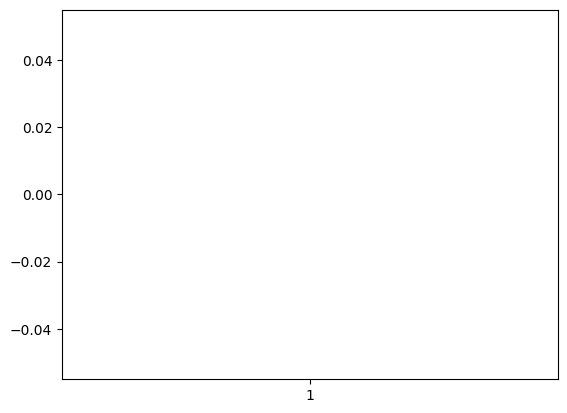

In [23]:
plt.boxplot(gross_earn)
plt.show()

Диаграмма пустая. Это связано с наличием пропущенных значений по признаку.
<br>Попробуйте построить гистограмму с помощью метода hist(), чтобы посмотреть на распределение признака.

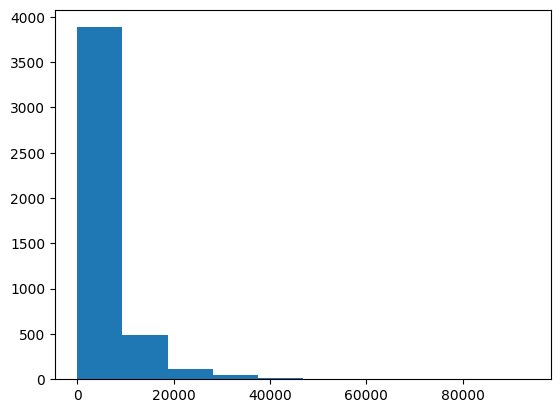

In [24]:
plt.hist(gross_earn)
plt.show()

Гистограмма показывает, на достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничьте графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново постройте "ящик с усами"

In [25]:
gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

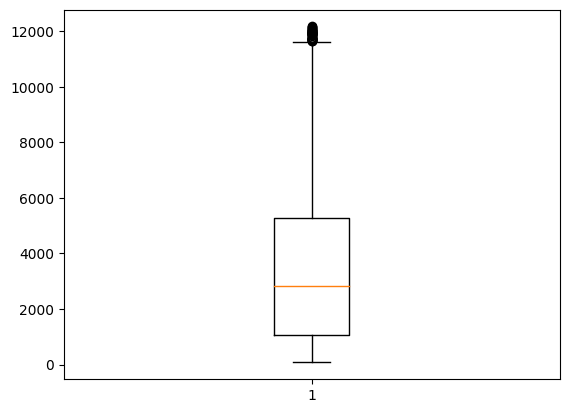

In [26]:
plt.boxplot(gross_earn_2)
plt.show()

Также, заново постройте гистограмму, при этом передав в нее параметр bins=20 для лучшей визуализации

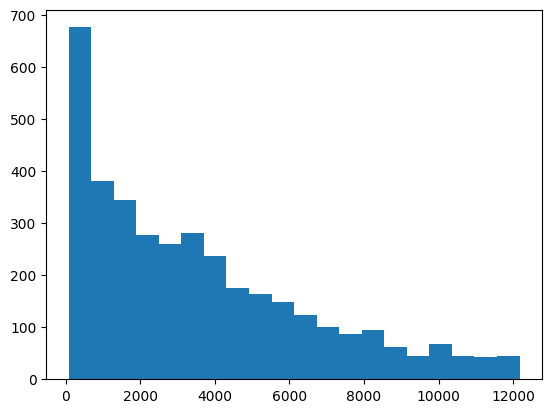

In [27]:
plt.hist(gross_earn_2, bins=20)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О максимальных и минимальных значениях признака (оцените размах значений).
2.   О нулевых значениях (их наличие, нужна ли предобработка).
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).

### **5.2. runtime_clear*

По аналогии проанализируйте продолжительность фильмов

In [ ]:
runtime = dataset['runtime_clear']
max_runtime = runtime.max()
min_runtime = runtime.min()
print("Наибольшее время -", max_runtime, " Наименьшее время -", min_runtime)

Наибольшее время - 366  Наименьшее время - 0


In [ ]:
mean_time = runtime.mean()
print('Средняя продолжительность: ', mean_time)

Средняя продолжительность:  109.606


## 6. Неграфический и графический анализ категориальных признаков

Выполните неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Оцените описательные статистики признака с помощью метода describe()

In [ ]:
dataset['certificate'].

Изучите уникальные значения признака, получив их с помощью метода unique()

In [ ]:
dataset['certificate'].

Проведите неграфический структурный анализ с помощью метода value_counts()

In [ ]:
dataset['certificate'].

Сохраните результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [ ]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

Постройте горизонтальную столбчатую диаграмму с помощью метода barh()

In [ ]:
plt.
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.show()

Выделите топ-5 классов, по которым больше всего фильмов и сохраните результат в переменную certificate_counts_top_5

In [ ]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]

Постройте круговую диаграмму с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

In [ ]:
plt.
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О количестве уникальных значений признака.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).

### **6.2. rating*

По аналогии проанализируйте рейтинг фильмов

### **6.3. director*

По аналогии проанализируйте кинорежиссеров

---



## 7. Анализ взаимосвязи двух количественных признаков

Выполните анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируйте библиотеку seaborn и присвойте ей короткое название sns

In [ ]:
import

Постройте диаграмму совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

In [ ]:
sns.
plt.show()

Сохраните колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и постройте диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

In [ ]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.
g.map(

Исключите выбросы, отфильтровав датасет по 99% процентилю. Для этого сохраните копию исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничьте значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [ ]:
new_dataset =
for col in columns:
  limiter =
  new_dataset =

Постройте диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

In [ ]:
g = sns.
g.map(

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).

## 8. Анализ взаимосвязи двух категориальных признаков

Выполните анализ взаимосвязи двух категориальных признаков

### *8.1. director - certificate*

Сохраните уникальные значения признака 'director', определенные с помощью метода unique(), в переменную directors и определите их количество с помощью функции len()

In [ ]:
directors =
len(directors)

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
dataset['director'].

Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Для корректного визуального представления распределения признака 'certificate' создайте словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраните уникальные значения признака, затем в переменную colors сохраните словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
labels =
colors =
colors

Для каждого кинорежиссера из топ-5 (directors_top_5) постройте круговые диаграммы с помощью метода pie(). Для этого отфильтруйте исходный датасет признаку director и сохраните его в переменную df; сохраните топ-5 классов фильмов (certificate), определенных с помощью метода value_counts() и среза, в переменную certificate_counts; выведите список уникальных значений топ-5 классов с помощью атрибута index и сохраните его в переменную labels; в качестве названия диаграммы передайте кинорежиссера с помощью метода title(); постройте диаграмму, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

In [ ]:
for director in directors_top_5:
  df =

  certificate_counts =
  labels =

  plt.title(director)
  plt.
  plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)

### **8.2. director - rating*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и кинорежиссерами

### **8.3. certificate - rating*

По аналогии проанализируйте взаимосвязь между классами фильмов и их рейтингом

## 9. Анализ взаимосвязи количественного и категориального признаков

Выполните анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Оцените медианные значения доходов с фильмов в разрезе классов фильмов. Для этого сгруппируйте датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [ ]:
dataset.groupby(

Оцените описательные статистики доходов с фильмов в разрезе классов фильмов, также сгруппировав таблицу и применив метод describe()

In [ ]:
dataset.groupby(

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов

In [ ]:
sns.
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оцените количество значений классов с помощью метода value_counts()

In [ ]:
dataset['certificate'].

По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраните список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [ ]:
certificate_list =
certificate_list

Отфильтруйте исходный датасет по признаку certificate с помощью метода isin() и сохраните его в переменную dataset_certificate_top_8. Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 25000 с помощью функции plt.axis() и параметров ymin и ymax

In [ ]:
sns.
plt.
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
3.   О средних величинах (как распределена медиана).

### **9.2. certificate - runtime_clear*

По аналогии проанализируйте взаимосвязь между классами фильмов и их продолжительностью

### **9.3. director - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и доходами с фильмов

### **9.4. director - runtime_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и продолжительностью фильмов

### **9.5. rating - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и доходами с фильмов

### **9.6. rating - runtime_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и их продолжительностью

## 10. Общий вывод

Соберите промежуточные выводы в итоговый вывод по разведочному анализу

**Поздравляем! Часть 2 задания по модулю EDA выполнена! Далее Вас ожидают кейсы на фильтрацию, срезы и группировку!**